## Project - Applying Data Science Methodology on Red Wine Quality Dataset

# EECS4404 Project 3

Jimmy Le<br>
216143992<br>
Prof. Archit Garg<br>
EECS4404 SU 2022

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*TODO*

We will take the diagnostic approach. Here we are provided the dataset for the wine quality, with various factors such as acidity, sugar, density, etc. Leveraging python's strengths in for data science & statistical analysis, we can analyze this dataset by observing each of these features and determining which differentiate a good quality wine and a poorer, less quality one.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*TODO*

In our dataset, we have several features which are used for determining quality red wine. These features are:

* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Free sulfuar dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

There is also the target variable, which is 'Quality', a score between 1 and 10 with 1 being the lowest quality and 10 being the highest.

### Data Collection

**Q3. From where do we get our data?**

*TODO*

We get our data from a study published in 2009 titled "Modeling Wine Preferences by Data Mining From Phsyciochemical Properties" by Paulo Cortez et al. The study attemps to predict human mine taste preferences based on analytical tests for wine. It uses vinho verde wine samples from Portugal.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*TODO*

Red and White Vinho Verde wine samples from portugal. In a passage from the original journal:

"...a unique product from the Minho region of Portugal....The data were collected from May/2004 to February/2007 using only protected designation of origina samples that were tested at the offical certification entity (CVRVV). THe CVRVV is an inter-professional organization with the goal of improving the quality and marketing of vinho verde. The data were collected by a computerized system, which automatically manages the process of wine sampling testing from producer reuqests to laboratory and sensory analysis."

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*TODO*

According the paper from which the data is from, the wine industry is investing in technology for growing both wine making and selling processes. Being able to certify and assess the quality of wine are key elements to prevent illegal adulteration, safeguard human health, and assure quality in the wine market.

Most importantly, by identifying the most influential factors, it can improve the qualities of wines and stratify certain wine brands as premium, allowing bussinesses set premium prices.

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [470]:
#Import libraries to be used to analyze dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

wine = pd.read_csv("winequality-red.csv")

In [471]:
wine.shape #We have 1599 data entries

(1599, 12)

In [472]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [473]:
#We can also describe the data and see any patterns which may emerge
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [474]:
#There is nothing too clearly discernable from the describe table. Let's see the info for the wine and see if we can find anything
wine.info()

#There appears to be no null values
#All the data points appears to be floats, while quality, our target variable are integers
#Which makes sense, as quality is scored on a 1 thru 10 integer scale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [475]:
# We can additionally verify which variables are categorical and continous with the following
for col in wine.columns:
    print('{}: {} unique values'.format(col, wine[col].nunique()))

fixed acidity: 96 unique values
volatile acidity: 143 unique values
citric acid: 80 unique values
residual sugar: 91 unique values
chlorides: 153 unique values
free sulfur dioxide: 60 unique values
total sulfur dioxide: 144 unique values
density: 436 unique values
pH: 89 unique values
sulphates: 96 unique values
alcohol: 65 unique values
quality: 6 unique values


In [476]:
#There appears to be no null values 
#All the non-target feature variables (not quality) appear to be continous variables

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [477]:
#We can verify for no null values with the following line
wine.isnull().sum() #0s in the output below mean no missing values
# Yay! No null or missing values!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

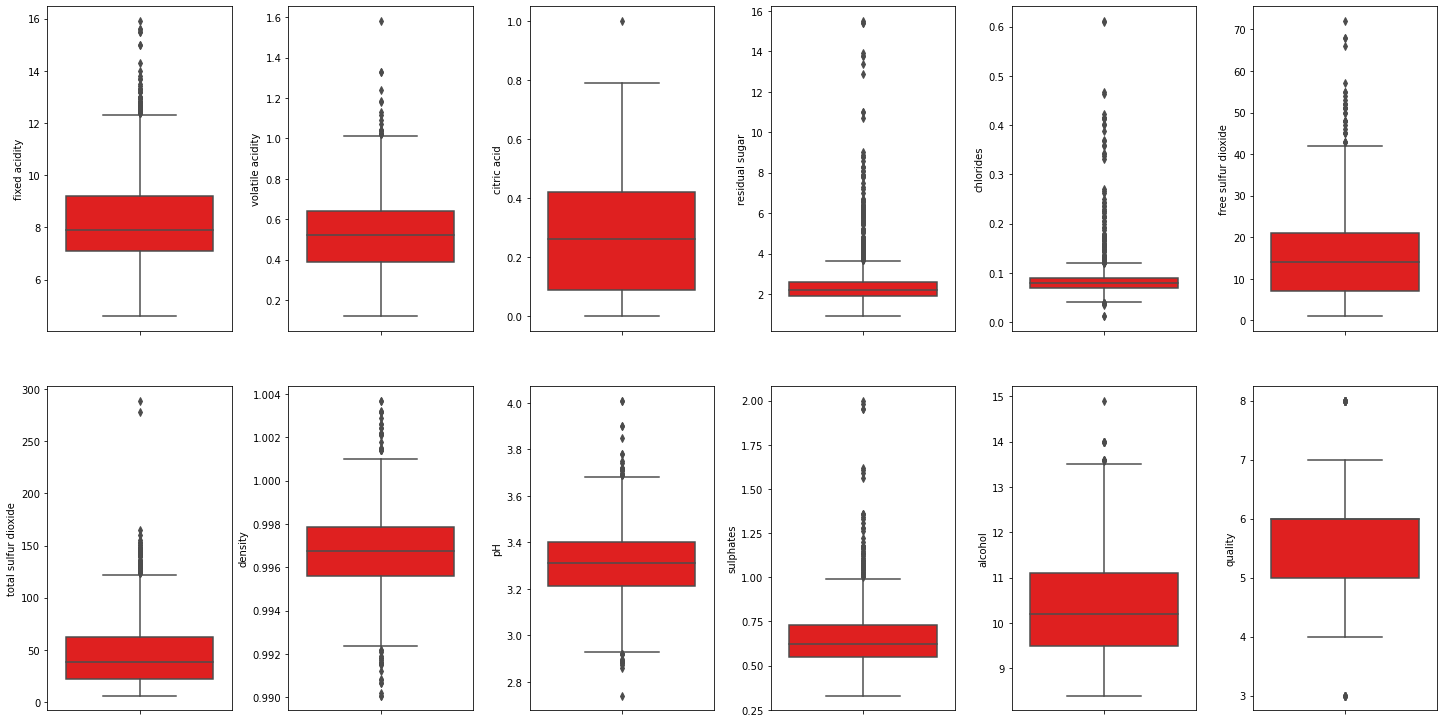

In [478]:
#Let's check for outliers. We can use boxplots as well as a function to verify the existance of outliers
#Let's start with boxplots
#Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plot our boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    sns.boxplot(y=col, data=wine, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [479]:
#Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
#We can interpret outliers as points outside the whiskers of our boxplot. 
#These are calculated by taking their respective quartile (1st or 3rd for bottom and top respectively) and adding 1.5*IQR
#    where the IQR is the interquartile range, which is the range between the 25th and 75th percentile (represented by the box itself)
#    Values outside this the 1st and third quartiles by factor of 1.5 timess are considered outliers
#We can see there are many outliers, in particular for features such as fixed and volatile acidity, residual sugar, and chlorides. I.e., plots with points outside the range of their whiskers

In [480]:
#We can also find outliers with the following function

#Finds outliers higher than a certain percentile
def detect_outlier(feature):
    outliers = []
    data = wine[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    #Loop through all values and count those who are larger than their given percentile/stds away
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

# Determine what the upperbound should be for our continuous features
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    detect_outlier(feat)


Outlier caps for fixed acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99p: 13.3 / 14 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99p: 50.0 / 16 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 

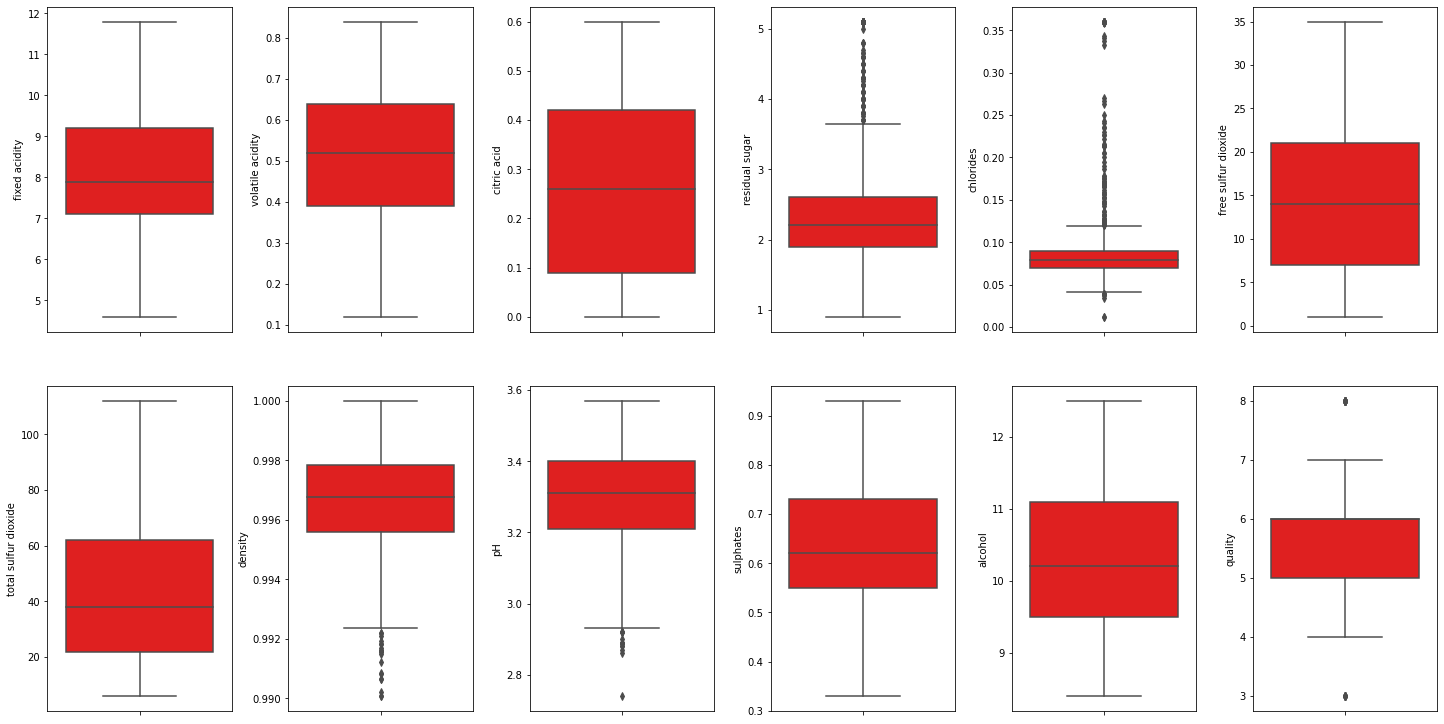

In [481]:
#95th percentile values seem respectable to cap, as they do not not remove too many outliers which seem respectable when compared to their means and standard deviations
#Let's deal with these outliers by capping these datapoints at the 95th percentile
wine['fixed acidity'] = wine['fixed acidity'].clip(upper=wine['fixed acidity'].quantile(.95))
wine['volatile acidity'] = wine['volatile acidity'].clip(upper=wine['volatile acidity'].quantile(.95))
wine['citric acid'] = wine['citric acid'].clip(upper=wine['citric acid'].quantile(.95))
wine['residual sugar'] = wine['residual sugar'].clip(upper=wine['residual sugar'].quantile(.95))
wine['chlorides'] = wine['chlorides'].clip(upper=wine['chlorides'].quantile(.99))
wine['free sulfur dioxide'] = wine['free sulfur dioxide'].clip(upper=wine['free sulfur dioxide'].quantile(.95))
wine['total sulfur dioxide'] = wine['total sulfur dioxide'].clip(upper=wine['total sulfur dioxide'].quantile(.95))
wine['density'] = wine['density'].clip(upper=wine['density'].quantile(.95))
wine['pH'] = wine['pH'].clip(upper=wine['pH'].quantile(.95))
wine['sulphates'] = wine['sulphates'].clip(upper=wine['sulphates'].quantile(.95))
wine['alcohol'] = wine['alcohol'].clip(upper=wine['alcohol'].quantile(.95))

#Verify capping was successful by plotting the boxplots of the data
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    sns.boxplot(y=col, data=wine, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

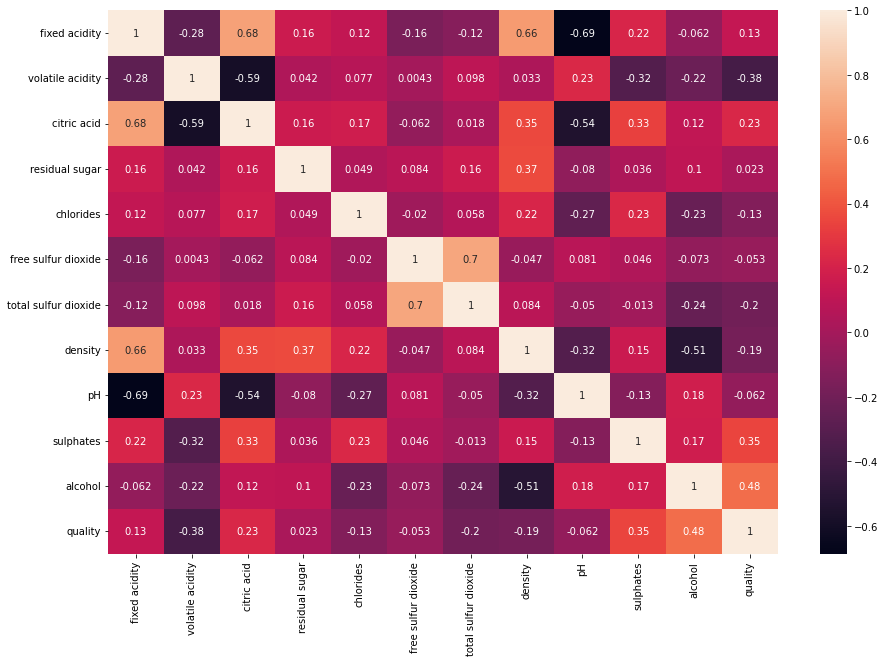

In [482]:
#We can see from above most of the outliers have been dealt with.
#We can implement the correlation heatmap below
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), annot=True)

In [483]:
#Citric acid, density, and pH have a strong correlation with 
#    fixed acidity
#Alcohol and sulphates seems somewhat correlated with the quality of the wine at 0.48
#    which may be a key indicator for our target variable

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

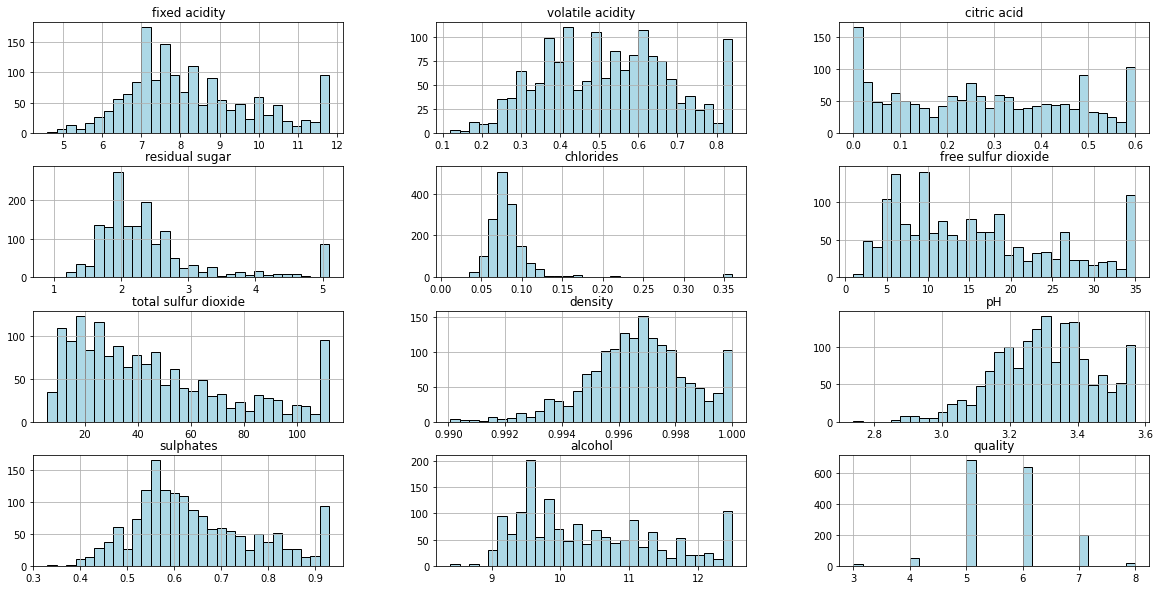

In [484]:
#Create histograms to observe distrubtion of data
wine.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')


In [485]:
#We can see some features have a normal-like distrubtion, such as fixed/volatile acidity, suphates, density.
#There does not seem to be too many long tails in the data. 
#We can also see that there is about an even distrubution between wine that is 5 and below and 6 and higher. The majority of wine qualities (scores) are between 5 and 6

In [486]:
#Before we start working on our data, it is good practice for ML project to scale our data
#Let's use the standard scaler for our features
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Scaling our features
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
    ], remainder='passthrough')
wine_scaled = ct.fit_transform(wine)

#wine_scaled = StandardScaler().fit_transform(wine)
wine_scaled = pd.DataFrame(wine_scaled, columns=wine.columns)

wine_scaled[:5] #Verify our standard scaling of our data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281,5.0
1,-0.292406,1.948042,-1.428672,0.204539,0.275132,1.028647,0.740393,0.056155,-0.739968,0.255380,-0.596241,5.0
2,-0.292406,1.458342,-1.214793,-0.140823,0.129042,-0.048820,0.297193,0.168655,-0.325001,0.024498,-0.596241,5.0
3,1.824367,-1.479857,1.565641,-0.601305,-0.284879,0.166674,0.501747,0.731156,-1.016613,-0.514226,-0.596241,6.0
4,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281,5.0


In [487]:
pd.DataFrame(wine_scaled).describe().head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,9.734413e-16,2.327372e-16,-9.887164e-17,7.770867e-16,9.244915e-17,6.717578e-17,6.329104e-16,-5.458992e-14,1.650198e-15,2.354798e-16,-6.608570e-16,5.636023
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.807569


<AxesSubplot:ylabel='Density'>

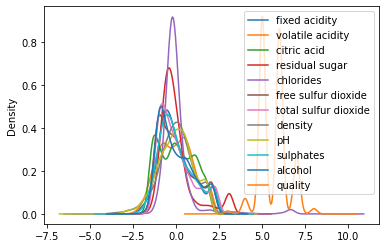

In [488]:
pd.DataFrame(wine_scaled).plot(kind='kde') #We can see the data has been standard scaled, with the data taking a normal distrubution around 0

In [489]:
pd.DataFrame(wine_scaled).to_csv('wine_scaled.csv', index=False) #Export results of scaling

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

In [490]:
wine_scaled = pd.read_csv('wine_scaled.csv') #Load in our scaled data
wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281,5.0
1,-0.292406,1.948042,-1.428672,0.204539,0.275132,1.028647,0.740393,0.056155,-0.739968,0.255380,-0.596241,5.0
2,-0.292406,1.458342,-1.214793,-0.140823,0.129042,-0.048820,0.297193,0.168655,-0.325001,0.024498,-0.596241,5.0
3,1.824367,-1.479857,1.565641,-0.601305,-0.284879,0.166674,0.501747,0.731156,-1.016613,-0.514226,-0.596241,6.0
4,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281,5.0


In [491]:
import pandas as pd
from sklearn.model_selection import train_test_split

features = wine_scaled.drop('quality', axis=1) #Set our features and labels
labels = wine_scaled[['quality']] #Label is target variable quality

#With our large dataset, let's opt for an 80-10-10 split of our data
#Split into training set (80% of data)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
#Split the remaining 20% in half for the validation and test set (10%, 10%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [492]:
#Verify split data 80-20-20
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2))

0.8
0.1
0.1


In [493]:
#Write out our data sets
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [494]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281
1,-0.292406,1.948042,-1.428672,0.204539,0.275132,1.028647,0.740393,0.056155,-0.739968,0.255380,-0.596241
2,-0.292406,1.458342,-1.214793,-0.140823,0.129042,-0.048820,0.297193,0.168655,-0.325001,0.024498,-0.596241
3,1.824367,-1.479857,1.565641,-0.601305,-0.284879,0.166674,0.501747,0.731156,-1.016613,-0.514226,-0.596241
4,-0.541439,1.091067,-1.428672,-0.601305,-0.260531,-0.479806,-0.384652,0.618656,1.404028,-0.668148,-0.995281
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.288535,0.478943,-1.000913,-0.486185,0.080346,1.782873,-0.043729,-1.012596,0.989061,-0.514226,0.102079
1595,-1.475309,0.172880,-0.893974,-0.255943,-0.601408,2.106113,0.194917,-0.888846,1.473189,0.871066,0.800399
1596,-1.226277,-0.071970,-0.733564,-0.140823,-0.260531,1.459633,-0.180098,-0.540096,0.781577,0.794105,0.600879
1597,-1.475309,0.754399,-0.787034,-0.486185,-0.284879,1.782873,-0.043729,-0.691971,1.818995,0.486263,-0.197201


In [495]:
labels

,quality
0,5.0
1,5.0
2,5.0
3,6.0
4,5.0
...,...
1594,5.0
1595,6.0
1596,6.0
1597,5.0


In [496]:
#Implement linear regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(features, labels)

LinearRegression()

In [497]:
print(LinReg.intercept_, LinReg.coef_) #We can see the intercept and the coefficents of our multilinear equation

[5.63602251] [[ 0.05811764 -0.1703473  -0.05617185  0.02139895 -0.0721388   0.03823889
  -0.09269967 -0.05952238 -0.06787459  0.19852609  0.26962747]]


In [498]:
print(LinReg.score(features, labels)) #37% score

0.37196851678250786


In [499]:
#Let's use another linear regression algorithm, ridge
#Source: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/#h2_14
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(features, labels)

print(ridgeReg.intercept_, ridgeReg.coef_) #Exact identical results from our linear regression

[5.63602251] [[ 0.05812119 -0.17033784 -0.05615421  0.02140167 -0.07213817  0.03823543
  -0.09269792 -0.05953472 -0.0678635   0.19852223  0.26961178]]


In [500]:
print(ridgeReg.score(features, labels)) #Same score too

#Overall, it appears that using linear regression algorithms may not be the best fit for this type of problem

0.3719685164134733


In [501]:
#Let's try a neural net to see if we can get a better result
#We use Keras and tensorflow to create our neural net model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.callbacks import History 
from keras.metrics import Precision, Recall
from matplotlib import pyplot as plt

n_classes = 10 #We have 10 different results for wine quality, ranging from 1 thru 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
y_test = to_categorical(y_test, n_classes)

#Our objective here is to use our NN as a multiclass classification model
#  where we will predict our result as a range between 1 thru 10
#  i.e., our wine quality scores


In [502]:
y_val[0] #We can see now it is in the one hot encoded format
#We use this format because it corresponds to our output layer
#Where we will use 10 nodes which correspond to each wine quality score

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [503]:
#We luckily do not need to flatten our input features
X_train.shape

(1279, 11)

In [504]:
X_test.shape

(160, 11)

In [505]:
y_train.shape

(1279, 10)

In [506]:
#Create our neural net model
model = Sequential([
  Dense(11, activation=tf.nn.relu), #11 for our input layer (11 features)
  Dense(200, activation=tf.nn.relu),
  Dense(100, activation=tf.nn.relu),
  Dense(10, activation=tf.nn.softmax) #10 for our output layer (10 possible scores for wine quality)
])


In [507]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall()]) #Performance metrics for later

In [508]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) #To prevent overfitting we use Earlystopping
#Without early stopping, the model overfits to the training set with marginal benifit to the loss 
#    and subsquently the val_accuracy (hovers around 56%-60%)

#history = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, callbacks=[callback],validation_data=(X_val, y_val)) #Can uncomment this and the above early stopping line to
#   implement early stopping, which can prevent overfitting by the model
history = model.fit(X_train, y_train, batch_size=128, epochs=60, verbose=1, validation_data=(X_val, y_val)) #Train our dataset



Epoch 1/60
10/10 [==============================] - 1s 35ms/step - loss: 2.0039 - accuracy: 0.4425 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 1.6757 - val_accuracy: 0.5250 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 0s 3ms/step - loss: 1.4803 - accuracy: 0.5395 - precision_9: 0.5403 - recall_9: 0.0524 - val_loss: 1.3327 - val_accuracy: 0.5500 - val_precision_9: 0.6034 - val_recall_9: 0.2188
Epoch 3/60
10/10 [==============================] - 0s 3ms/step - loss: 1.2272 - accuracy: 0.5496 - precision_9: 0.5721 - recall_9: 0.3073 - val_loss: 1.1938 - val_accuracy: 0.5625 - val_precision_9: 0.5833 - val_recall_9: 0.3938
Epoch 4/60
10/10 [==============================] - 0s 3ms/step - loss: 1.1095 - accuracy: 0.5614 - precision_9: 0.6055 - recall_9: 0.3589 - val_loss: 1.1236 - val_accuracy: 0.5875 - val_precision_9: 0.6076 - val_recall_9: 0.3000
Epoch 5/60
10/10 [==============================] - 0s 3ms/step

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

In [509]:
#For our two regression models, the coefficents and intercept are identical for both, so we only need to do this once
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predicted = [] #Store the predicted values

for index, row in features.iterrows():
    predicted.append((row['fixed acidity'] * LinReg.coef_[0][0] + row['volatile acidity'] * LinReg.coef_[0][1] + row['citric acid'] * LinReg.coef_[0][2] + row['residual sugar'] * LinReg.coef_[0][3] +
    row['chlorides'] * LinReg.coef_[0][4] + row['free sulfur dioxide'] * LinReg.coef_[0][5] + row['total sulfur dioxide'] * LinReg.coef_[0][6] + row['density'] * LinReg.coef_[0][7] + 
    row['pH'] * LinReg.coef_[0][8] + row['sulphates'] * LinReg.coef_[0][9] + row['alcohol'] * LinReg.coef_[0][10]))

predicted

[-0.646960986118386,
 -0.37653793197098884,
 -0.38279928541877384,
 0.0003494148414843745,
 -0.646960986118386,
 -0.6166802983066191,
 -0.6075731195539329,
 -0.351448890328457,
 -0.3172357583767792,
 0.09218504455700274,
 -0.604798024877373,
 0.09218504455700274,
 -0.5496953442087438,
 -0.07694966304615031,
 -0.26747354317456773,
 -0.18577560064471782,
 0.22773331626484727,
 -0.3530501452985967,
 -0.6419108958275751,
 -0.13625900716651235,
 -0.2045906076330715,
 -0.27764484568142295,
 0.27734695237458584,
 -0.39070169627376733,
 -0.11685114273766231,
 -0.2662367939799406,
 -0.14078369077111977,
 0.27734695237458584,
 -0.6424818131416687,
 -0.27735878012335735,
 -0.5049373377384845,
 -0.24802349075387403,
 -0.37613629732269527,
 -0.6570795973916284,
 -0.4353617633049468,
 -0.4246569269026642,
 -0.058444403098827494,
 0.17667171590381028,
 -0.9117499117954981,
 0.2138452514922624,
 0.2138452514922624,
 -0.5839115137628851,
 0.12366377334262457,
 0.33966441994305296,
 -0.5187876161498166,

In [510]:
r2_score(labels.values, predicted) #Calculate our r2_score

-48.36487245147158

In [511]:
mean_squared_error(labels.values, predicted) #RMSE

32.17407591765107

In [512]:
mean_absolute_error(labels.values, predicted) #RMAE

5.636022514071292

In [ ]:
#This does not seem right!!! The output should be in percentages (i.e., 0.56 as in 56% or 0.2 for 20%)
#NEXT STEPS FOR THE PROGRAMMER...and for the instructor to know I'm doing my best :(    
#   It appears to implement the r2_score, mean_squared_error, and mean_absolute_error,
#   the first arg is a list of true values, and the second arg seems to be a list of predicted values (from by our algorithm)
#   Likely, the method to get the predicted values is incorrect
#   If we had the correct way to obtain the predicted values and provided it as the 2nd arg, this might be correct

Feature: 0, Score: 0.05812
Feature: 1, Score: -0.17035
Feature: 2, Score: -0.05617
Feature: 3, Score: 0.02140
Feature: 4, Score: -0.07214
Feature: 5, Score: 0.03824
Feature: 6, Score: -0.09270
Feature: 7, Score: -0.05952
Feature: 8, Score: -0.06787
Feature: 9, Score: 0.19853
Feature: 10, Score: 0.26963


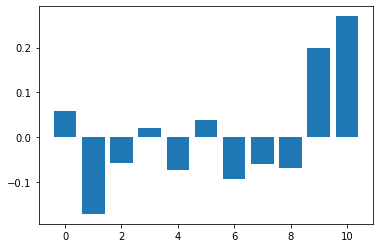

In [513]:
#Find feature importance from provided link above: https://machinelearningmastery.com/calculate-feature-importance-with-python/

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

importance = LinReg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [514]:
#We can see that the strongest features are features 1, 9, 10, OR volatile acidity, sulphates, and alcohol respectively.
#We can treat features as weighted sums of importance when it comes to linear regression models
#Since those values had the highest (absolute) coefficent values compared to the other variables, they have stronger influence over
#   predicting the targert variable (quality)

In [515]:
history_dict = history.history
print(history_dict.keys()) #Grab names of the neural net history (for which variables to plot below)

dict_keys(['loss', 'accuracy', 'precision_9', 'recall_9', 'val_loss', 'val_accuracy', 'val_precision_9', 'val_recall_9'])


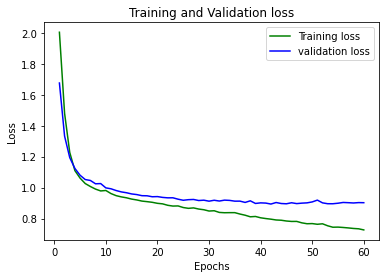

In [517]:
#Plot loss and validation loss for our neural net
# Source: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,callback.stopped_epoch+2)
epochs = range(1,61)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

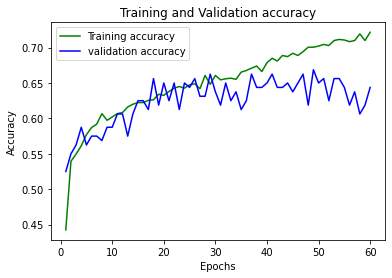

In [518]:
# Source: https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
#epochs = range(1,callback.stopped_epoch+2)
epochs = range(1,61)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# evaluate_model('Neural Net Multiclassification', model, X_test, y_test)
model.evaluate(X_test, y_test) #After we're done training, we can evaluate, and we should see a similar result on the test set

#Evaluated results from the test set are comparable with the validation scores, and somewhat comparable with the training set
#  The training set is likely more accurate due to overfitting in the neural net

5/5 [==============================] - 0s 1ms/step - loss: 1.0008 - accuracy: 0.6062 - precision_8: 0.6294 - recall_8: 0.5625


[1.0008021593093872, 0.606249988079071, 0.6293706297874451, 0.5625]

### Conclusion

*TODO*

In [ ]:
#The neural net is a far more effective tool for classifying correct wine types than linear regression models.
#However, the neural net seems to primarily limited by overfitting the of the model
#Volatile acidity, sulphates, and alcohol appear to be the strongest correlators for improving Wine Quality
#The next steps for the programmer are to:
#    Fine tune and experiment with more parameters, particularly epoch size, node density, and batch size to find the ideal training paramets
#    Which will best generalize for unseen data!